### carregando os arquivos

In [21]:
import pandas as pd

#mulheres não negras
df_nao_negras = pd.read_csv("taxa-de-homicidios-mulheres-nao-negras.csv", sep=";", low_memory=False)
df_nao_negras["grupo"] = "Mulheres não negras"

#mulheres negras
df_negras = pd.read_csv("taxa-de-homicidios-mulheres-negras.csv", sep=";", low_memory=False)
df_negras["grupo"] = "Mulheres negras"

### verificando os nomes das colunas

In [24]:
print(df_nao_negras.columns)
print(df_negras.columns)

Index(['cod', 'nome', 'período', 'valor', 'grupo'], dtype='object')
Index(['cod', 'nome', 'período', 'valor', 'grupo'], dtype='object')


### juntando os dataframes

In [25]:
df_comparado = pd.concat([df_nao_negras, df_negras], ignore_index=True)

print(df_comparado.head(10))
print(df_comparado["grupo"].value_counts())

   cod nome  período  valor                grupo
0   43   RS     2000  3.050  Mulheres não negras
1   33   RJ     2000  5.330  Mulheres não negras
2   32   ES     2000  2.988  Mulheres não negras
3   11   RO     2000  7.650  Mulheres não negras
4   50   MS     2000  6.354  Mulheres não negras
5   16   AP     2000  0.000  Mulheres não negras
6   29   BA     2000  0.935  Mulheres não negras
7   53   DF     2000  1.295  Mulheres não negras
8   22   PI     2000  0.937  Mulheres não negras
9   24   RN     2000  2.237  Mulheres não negras
grupo
Mulheres não negras    621
Mulheres negras        621
Name: count, dtype: int64


### comparação entre a evolução da taxa média

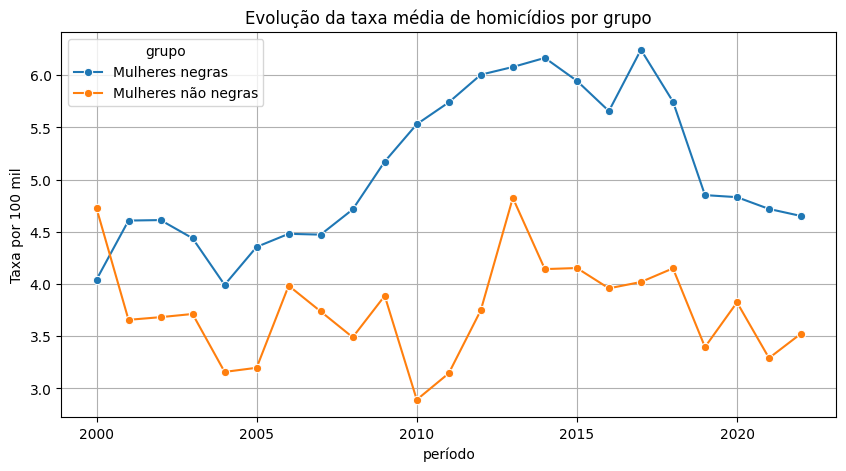

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

df_comparado["valor"] = df_comparado["valor"].astype(float)

media_por_ano = df_comparado.groupby(["período", "grupo"])["valor"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=media_por_ano, x="período", y="valor", hue="grupo", marker="o")
plt.title("Evolução da taxa média de homicídios por grupo")
plt.ylabel("Taxa por 100 mil")
plt.grid(True)
plt.show()

### evolução da taxa de homicídio de mulheres no estado de SP entre 2000 e 2022

/tmp/ipython-input-1478719780.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp["valor"] = df_sp["valor"].astype(float)


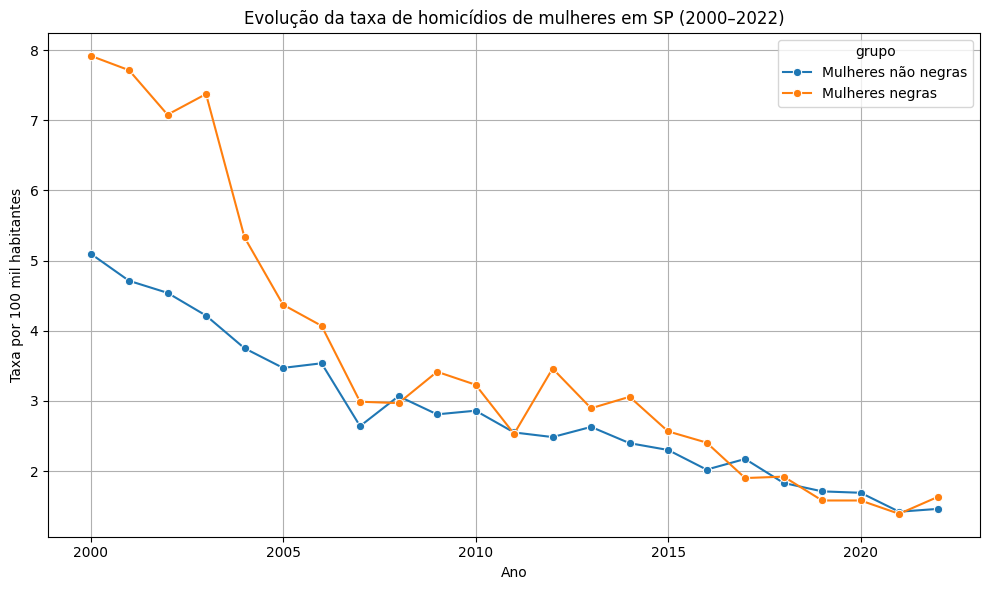

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar apenas SP
df_sp = df_comparado[df_comparado["nome"] == "SP"]

# Garantir que "valor" está como float
df_sp["valor"] = df_sp["valor"].astype(float)

# Plotar
plt.figure(figsize=(10,6))
sns.lineplot(data=df_sp, x="período", y="valor", hue="grupo", marker="o")
plt.title("Evolução da taxa de homicídios de mulheres em SP (2000–2022)")
plt.ylabel("Taxa por 100 mil habitantes")
plt.xlabel("Ano")
plt.grid(True)
plt.tight_layout()
plt.show()

### aplicação de testes estatísticos

Teste t de Student:
Estatística t: 1.619
Valor-p: 0.1150
➤ Conclusão: Diferença NÃO significativa entre as médias.

Regressão linear (tendência temporal):
Mulheres negras: coeficiente = -0.274 → Tendência de queda
Mulheres não negras: coeficiente = -0.150 → Tendência de queda

Diferença média (negras - não negras): 0.783


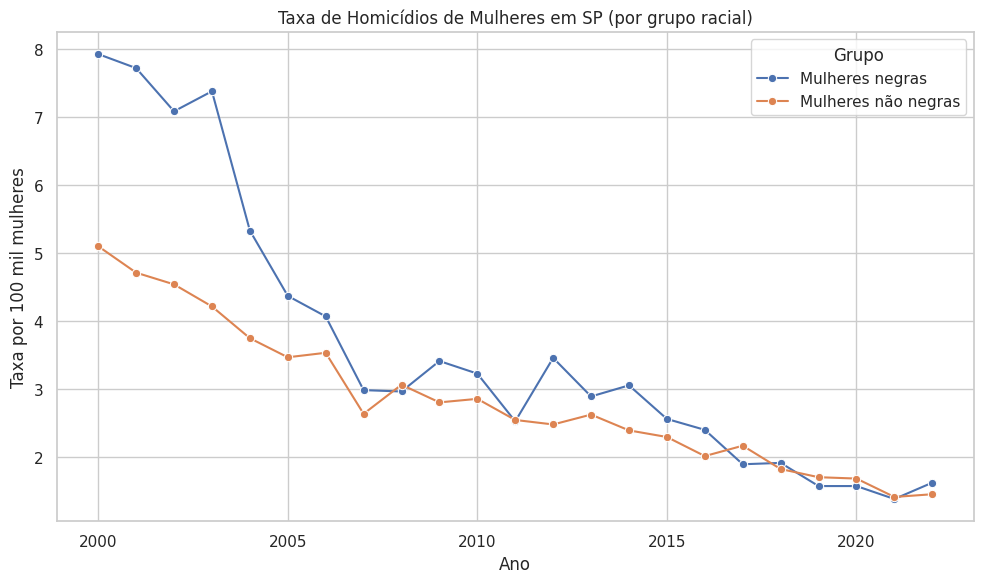

In [34]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

sns.set(style="whitegrid")

# estado de São Paulo
df_sp = df[df["nome"] == "SP"].copy()

df_sp["período"] = pd.to_numeric(df_sp["período"], errors="coerce")
df_sp["valor"] = pd.to_numeric(df_sp["valor"], errors="coerce")

# 2. Comparação de Médias: Teste t de Student
tx_negras = df_sp[df_sp["grupo"] == "Mulheres negras"]["valor"]
tx_nao_negras = df_sp[df_sp["grupo"] == "Mulheres não negras"]["valor"]

t_stat, p_valor = stats.ttest_ind(tx_negras, tx_nao_negras, equal_var=False)

print("Teste t de Student:")
print(f"Estatística t: {t_stat:.3f}")
print(f"Valor-p: {p_valor:.4f}")
if p_valor < 0.05:
    print("➤ Conclusão: Diferença significativa entre as médias das taxas.")
else:
    print("➤ Conclusão: Diferença NÃO significativa entre as médias.")

# 3. Regressão linear (tendência ao longo do tempo)
print("\nRegressão linear (tendência temporal):")
for grupo in ["Mulheres negras", "Mulheres não negras"]:
    dados = df_sp[df_sp["grupo"] == grupo].dropna()
    X = dados["período"].values.reshape(-1, 1)
    y = dados["valor"].values
    modelo = LinearRegression().fit(X, y)
    coef = modelo.coef_[0]
    print(f"{grupo}: coeficiente = {coef:.3f} → Tendência {'de alta' if coef > 0 else 'de queda'}")

# 4. Diferença média entre os grupos
tx_negras = tx_negras.reset_index(drop=True)
tx_nao_negras = tx_nao_negras.reset_index(drop=True)

min_len = min(len(tx_negras), len(tx_nao_negras))
media_diferenca = (tx_negras[:min_len] - tx_nao_negras[:min_len]).mean()

print(f"\nDiferença média (negras - não negras): {media_diferenca:.3f}")

# 5. Visualização da série temporal
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sp, x="período", y="valor", hue="grupo", marker="o")
plt.title("Taxa de Homicídios de Mulheres em SP (por grupo racial)")
plt.xlabel("Ano")
plt.ylabel("Taxa por 100 mil mulheres")
plt.legend(title="Grupo")
plt.tight_layout()
plt.show()